In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

pd.set_option("display.max_columns",100)

In [2]:
df = pd.read_csv('failure.csv')

### EDA - Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [4]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [5]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [6]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [8]:
df.corr(numeric_only=True)

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


In [10]:
abs(df.corr(numeric_only=True)['failure']).sort_values(ascending=False)

failure       1.000000
attribute7    0.119055
attribute8    0.119055
attribute4    0.067398
attribute2    0.052902
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
attribute3    0.000948
attribute6    0.000550
Name: failure, dtype: float64

In [11]:
df['failure'].value_counts().to_frame()

,count
failure,
0,124388
1,106


### Data Visualization

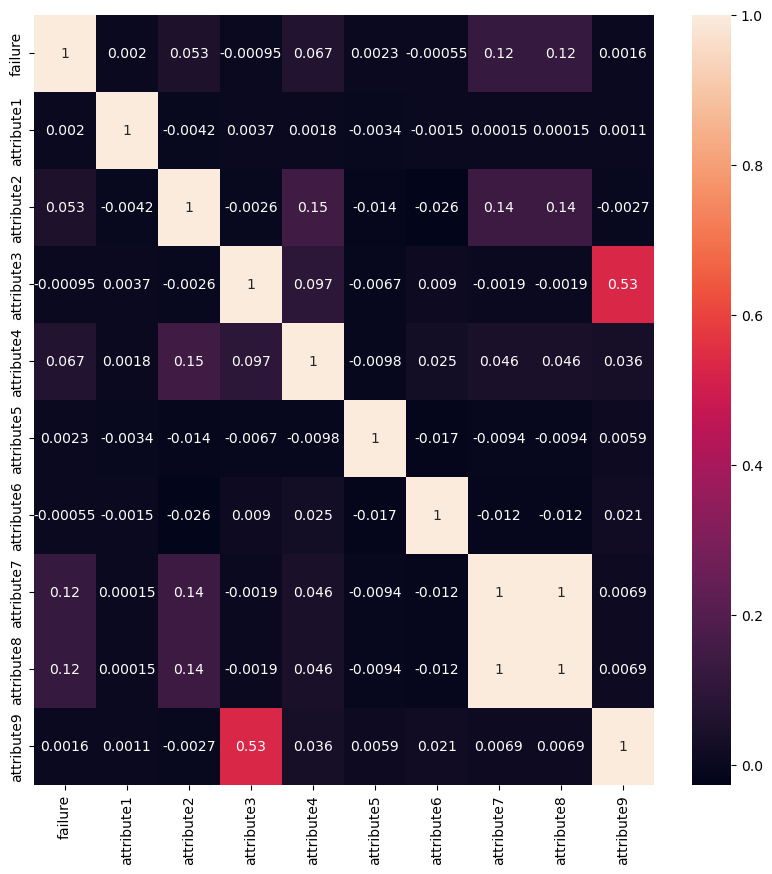

In [13]:
ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(numeric_only=True),annot = True);

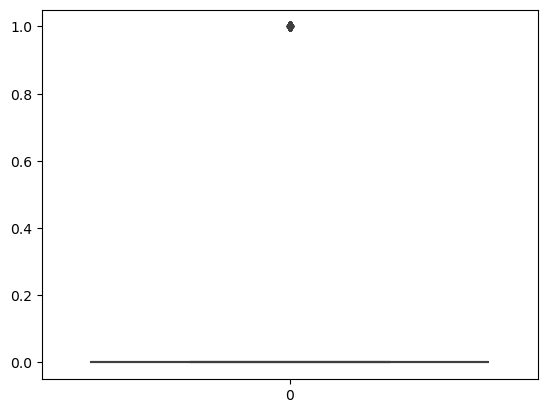

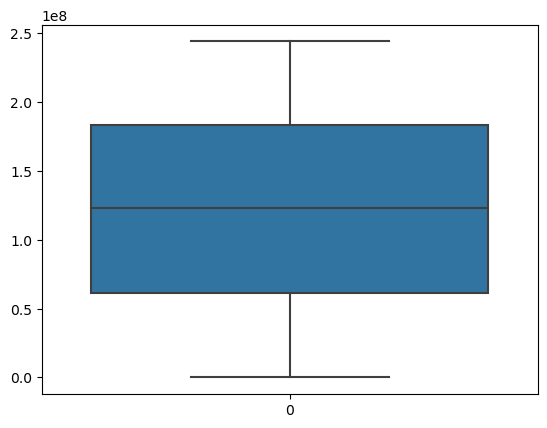

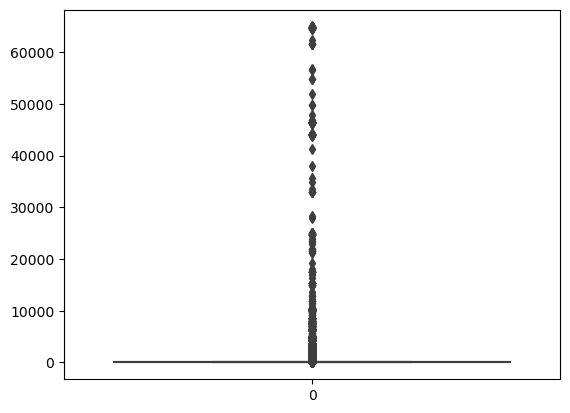

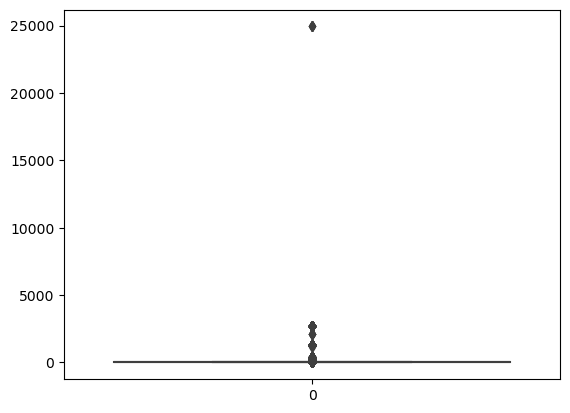

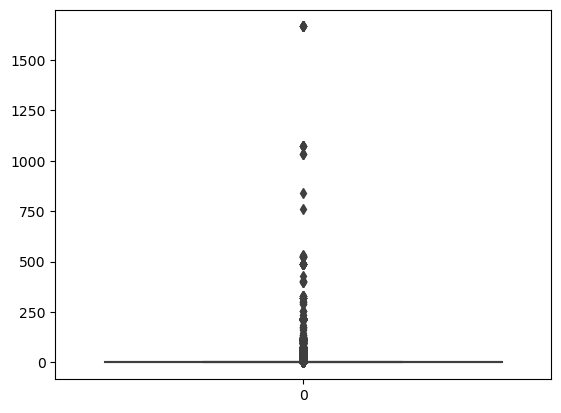

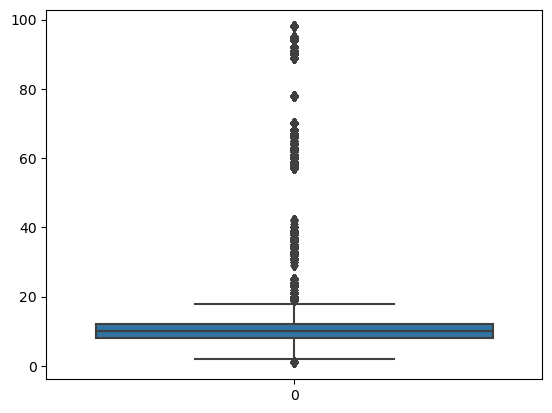

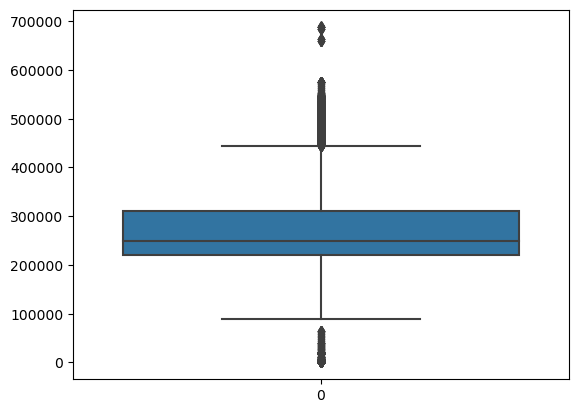

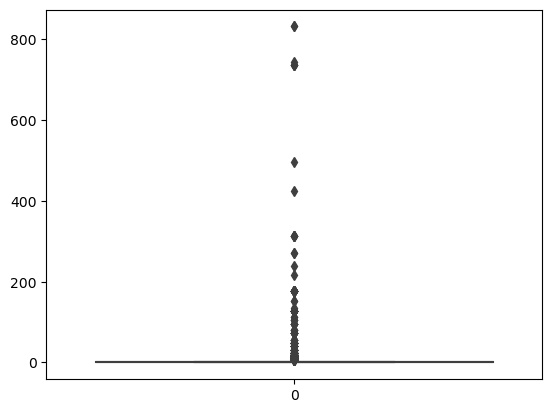

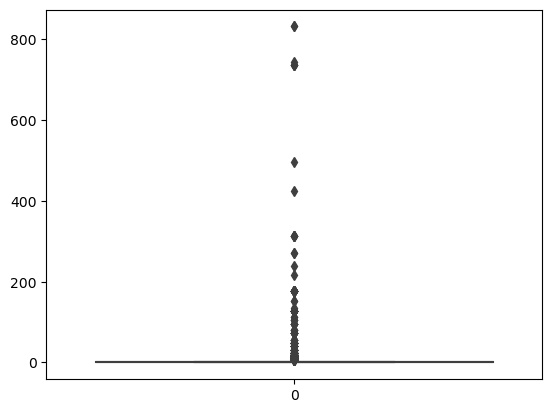

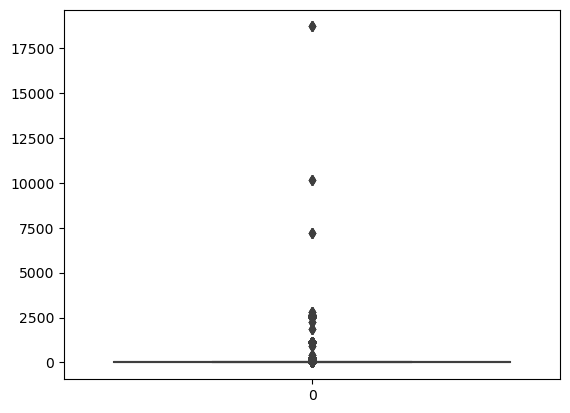

In [14]:
for i in df.select_dtypes(include=np.number):
    sns.boxplot(df[i])
    plt.show()

### Feature Engineering

In [15]:
df["date"]=pd.to_datetime(df["date"])

In [16]:
df["year"]=2021-df["date"].dt.year
df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.day

In [17]:
df.sample(10)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day
33252,2015-02-12,W1F0R8W2,0,35694656,0,0,0,12,309996,0,0,0,6,2,12
61709,2015-03-26,W1F1C0R9,0,112053296,0,1,0,11,224804,0,0,2,6,3,26
112993,2015-08-14,S1F0S4MG,0,54402176,0,0,0,14,290114,0,0,0,6,8,14
121348,2015-09-29,Z1F0LNQB,0,48864560,0,0,0,10,526185,0,0,0,6,9,29
114222,2015-08-18,W1F1DN3S,0,148096072,0,0,0,11,251819,0,0,0,6,8,18
76853,2015-05-02,S1F11G2C,0,118368408,0,0,0,16,340964,0,0,0,6,5,2
124390,2015-10-29,W1F0N84F,0,220571872,0,0,0,8,401071,0,0,1,6,10,29
55251,2015-03-16,Z1F0M0XP,0,93544232,0,0,0,10,317626,0,0,3,6,3,16
69997,2015-04-13,W1F1B0KF,0,94108504,0,0,0,10,2054,0,0,0,6,4,13
78138,2015-05-05,Z1F0MBGF,0,158060392,0,0,0,57,246204,0,0,0,6,5,5


In [18]:
(df["attribute7"]==df["attribute8"]).value_counts()

True    124494
Name: count, dtype: int64

In [19]:
df.year.value_counts()

year
6    124494
Name: count, dtype: int64

In [20]:
# Delete #year and #attribute8 because it will not affect our result since all data of the two columns are the same
df.drop(["attribute8","year"],axis=1,inplace=True)

In [21]:
# We dont need #date anymore
del df["date"]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   device      124494 non-null  object
 1   failure     124494 non-null  int64 
 2   attribute1  124494 non-null  int64 
 3   attribute2  124494 non-null  int64 
 4   attribute3  124494 non-null  int64 
 5   attribute4  124494 non-null  int64 
 6   attribute5  124494 non-null  int64 
 7   attribute6  124494 non-null  int64 
 8   attribute7  124494 non-null  int64 
 9   attribute9  124494 non-null  int64 
 10  month       124494 non-null  int32 
 11  day         124494 non-null  int32 
dtypes: int32(2), int64(9), object(1)
memory usage: 10.4+ MB


In [23]:
df.sample(10)

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,month,day
82810,S1F0PJJW,0,145571680,0,0,0,8,269971,0,0,5,18
40850,W1F0P2TN,0,60433296,0,0,0,12,311685,0,0,2,23
62378,Z1F0QGSE,0,227784864,0,0,0,32,324474,0,0,3,27
66291,Z1F19KMH,0,41649464,0,0,0,14,45,0,5,4,4
121256,S1F1162D,0,242670312,0,0,0,7,297853,0,0,9,29
3486,Z1F26YZB,0,234190248,0,1,0,1,274150,0,0,1,3
28781,S1F0TQJ4,0,177082000,0,0,0,8,266104,0,0,2,6
89703,W1F1CMCY,0,25175800,0,0,0,6,19160,0,0,6,6
37657,W1F1DQN8,0,181463128,0,0,0,10,29,0,0,2,18
108064,S1F0GJL9,0,191933648,0,0,0,63,251466,0,0,7,30


In [24]:
df.isnull().sum()

device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute9    0
month         0
day           0
dtype: int64

### Modeling

In [25]:
x,y=df.drop("failure",axis=1),df["failure"]

In [26]:
x=pd.get_dummies(x, drop_first=True)

In [27]:
x.shape,y.shape

((124494, 1177), (124494,))

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Modelleri tanımlayalım
g = GaussianNB()
b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()

# Toplu Classification Model Eğitimi Fonksiyonu
def classification_fun(x, y):
    modeller=[g, b, l, d, r, gb, kn]
    isimler=["GaussianNB", "BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    for model in modeller:
        model=model.fit(x_train,y_train)
        tahmin=model.predict(np.array(x_test) if model==kn else x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(tahmin, y_test))
        precision.append(precision_score(tahmin, y_test))
        recall.append(recall_score(tahmin, y_test))
        f1.append(f1_score(tahmin, y_test))
        
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("The most successful model: ", metrics.iloc[0].name)
    print(classification_report(metrics.iloc[0,-1].predict(x_test), y_test))
    
    return metrics.drop("Model", axis=1)

In [30]:
classification_fun(x,y)

The most successful model:  GaussianNB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24861
           1       0.11      0.05      0.07        38

    accuracy                           1.00     24899
   macro avg       0.55      0.53      0.54     24899
weighted avg       1.00      1.00      1.00     24899



,Accuracy,Precision,Recall,F1
GaussianNB,0.997912,0.111111,0.052632,0.071429
BernoulliNB,0.999277,0.000000,0.000000,0.000000
LogisticRegression,0.999277,0.000000,0.000000,0.000000
DecisionTreeClassifier,0.998956,0.000000,0.000000,0.000000
RandomForestClassifier,0.999277,0.000000,0.000000,0.000000
GradientBoostingClassifier,0.999277,0.000000,0.000000,0.000000
KNeighborsClassifier,0.999277,0.000000,0.000000,0.000000


In [39]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [40]:
g= GaussianNB()
b=BernoulliNB()

In [41]:
g.fit(x,y)
b.fit(x,y)

BernoulliNB()

In [42]:
guess1=g.predict(x)
guess2=b.predict(x)

In [47]:
accuracy_score(guess1, y)

0.9974054974536926

In [49]:
confusion_matrix(guess1, y)

array([[124163,     98],
       [   225,      8]])

In [51]:
print(classification_report(guess2, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    124494
           1       0.00      0.00      0.00         0

    accuracy                           1.00    124494
   macro avg       0.50      0.50      0.50    124494
weighted avg       1.00      1.00      1.00    124494



In [52]:
accuracy_score(guess2, y)

0.9991485533439363

In [53]:
confusion_matrix(guess2, y)

array([[124388,    106],
       [     0,      0]])